In [1]:
# =========================
# 02_preprocessing.ipynb
# =========================

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Chemin vers les données
data_path = "../data/cleaned/"
df=pd.read_csv(os.path.join(data_path, "dataset_explored.csv"))

# Séparation des colonnes Target 

In [2]:
# Targets (jamais modifiées)
y_lvl1 = df["Binary_Label"]
y_lvl2 = df["Attack_Family"]

# Features
X = df.drop(columns=[
    "Label",
    "Label_Original",
    "Attack_Family",
    "Binary_Label"
])


In [3]:
print(X.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

# nettoyer les valeurs manquantes

In [4]:
import numpy as np

# 1. Nettoyage X
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# 2. Alignement des labels
y_lvl1 = y_lvl1.loc[X.index]
y_lvl2 = y_lvl2.loc[X.index]


In [15]:
X.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64

In [16]:
y_lvl1.isnull().sum()

0

In [17]:
y_lvl2.isnull().sum()

0

In [5]:
print("Shape de X :", X.shape)
print("Shape de y_lvl1 :", y_lvl1.shape)
print("Shape de y_lvl2 :", y_lvl2.shape)


Shape de X : (2827876, 78)
Shape de y_lvl1 : (2827876,)
Shape de y_lvl2 : (2827876,)


In [6]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


# Réduction des features correlés 

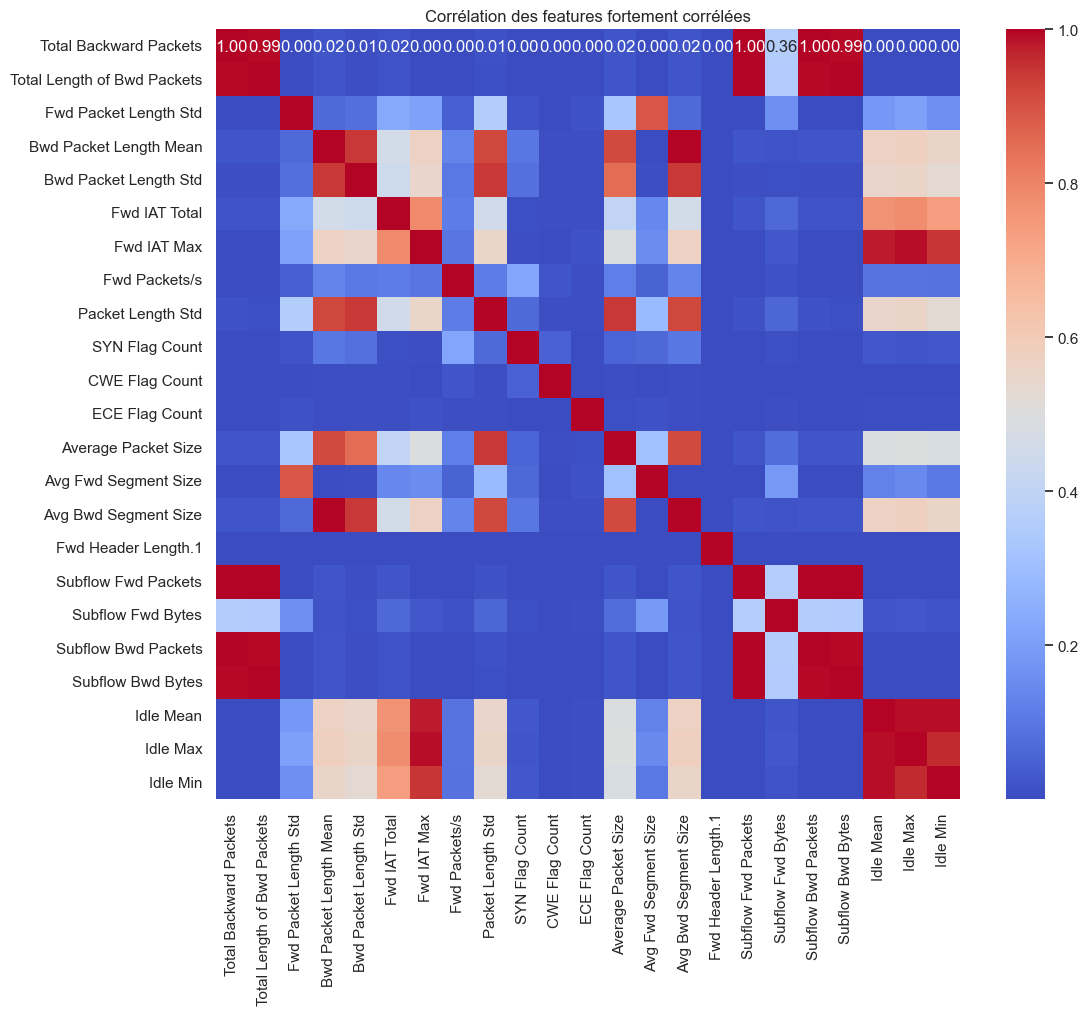

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Calcul de la corrélation
corr_matrix = X.corr().abs()
# Sélection des corrélations supérieures à 0.95 (hors diagonale)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Colonnes fortement corrélées
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
# Matrice de corrélation limitée à certaines colonnes pour lisibilité
sns.set(style="white")
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix.loc[high_corr_features, high_corr_features],
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation des features fortement corrélées")
plt.show()


In [11]:

print(f"Nombre de features fortement corrélées (>0.95) : {len(high_corr_features)}")
print(high_corr_features)


Nombre de features fortement corrélées (>0.95) : 23
['Total Backward Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total', 'Fwd IAT Max', 'Fwd Packets/s', 'Packet Length Std', 'SYN Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Idle Mean', 'Idle Max', 'Idle Min']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1️⃣ Liste des features à supprimer
# -----------------------------
# Explication :
# - Total Backward Packets : redondant avec Total Length of Bwd Packets → garder volume plutôt que compte
# - Fwd Packet Length Std, Bwd Packet Length Std : redondant avec Mean → garder moyenne
# - Fwd IAT Max : redondant avec Fwd IAT Total → garder total
# - Fwd Packets/s : redondant avec Total Fwd Packets / Flow Duration
# - Packet Length Std : redondant avec Packet Length Mean
# - CWE Flag Count, ECE Flag Count : peu informatif pour la majorité des attaques
# - Avg Fwd Segment Size, Avg Bwd Segment Size : redondant avec Average Packet Size
# - Fwd Header Length.1 : redondant avec Fwd Header Length
# - Subflow Fwd Packets, Subflow Bwd Packets, Subflow Fwd Bytes : garder seulement Subflow Bwd Bytes
# - Idle Max, Idle Min : garder Idle Mean comme représentatif de l’activité idle
to_drop = [
    'Total Backward Packets',
    'Fwd Packet Length Std',
    'Bwd Packet Length Std',
    'Fwd IAT Max',
    'Fwd Packets/s',
    'Packet Length Std',
    'CWE Flag Count',
    'ECE Flag Count',
    'Avg Fwd Segment Size',
    'Avg Bwd Segment Size',
    'Fwd Header Length.1',
    'Subflow Fwd Packets',
    'Subflow Bwd Packets',
    'Subflow Fwd Bytes',
    'Idle Max',
    'Idle Min'
]

# -----------------------------
# 2️⃣ Création d'un nouveau DataFrame réduit
# -----------------------------
X_reduced = X.drop(columns=to_drop)
print("Nombre de features après suppression :", X_reduced.shape[1])

# -----------------------------
# 3️⃣ Vérification des corrélations restantes
# -----------------------------
corr_matrix_reduced = X_reduced.corr().abs()
upper_reduced = corr_matrix_reduced.where(
    np.triu(np.ones(corr_matrix_reduced.shape), k=1).astype(bool)
)
high_corr_after = [col for col in upper_reduced.columns if any(upper_reduced[col] > 0.95)]
print("Features encore fortement corrélées :", high_corr_after)  # idéalement vide



Nombre de features après suppression : 62
Features encore fortement corrélées : ['Total Length of Bwd Packets', 'Bwd Packet Length Mean', 'Fwd IAT Total', 'SYN Flag Count', 'Average Packet Size', 'Subflow Bwd Bytes', 'Idle Mean']
Shape X_scaled : (2827876, 62)
Features gardées : ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length V

In [ ]:
y_lvl2.value_counts()

In [18]:
y_lvl1.value_counts()

Binary_Label
0    2271320
1     556556
Name: count, dtype: int64

# Standardisation

In [19]:
# -----------------------------
# 4️⃣ Standardisation
# -----------------------------
# StandardScaler transforme les features pour avoir moyenne=0 et écart-type=1
# Important pour les modèles sensibles à l’échelle ou à la distance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# -----------------------------
# ✅ Résumé
# -----------------------------
print("Shape X_scaled :", X_scaled.shape)
print("Features gardées :", X_reduced.columns.tolist())

Shape X_scaled : (2827876, 62)
Features gardées : ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd 